### Problem 1 (5 points)

Nearly 1.8 million bachelor’s degrees and over 750,000 master’s degrees are awarded annually by U.S. postsecondary institutions (National Center for Education Statistics web- site, November, 2014). The department of Education tracks the field of study for these graduates in the following categories: Business (B), Computer Sciences and Engineering (CSE), Education (E), Humanities (H), Natural Sciences and Mathematics (NSM), Social and Behavioral Sciences (SBS), and Other (O).

Please read the data from "Majors.csv" and complete the following tasks. Make sure that "Majors.csv" is in your working directory. Pay attention to the format of the data and do not make any change to the data file.

In [19]:
# 1-1: Provide a percent frequency distribution of field of study for each degree
import csv

fields_of_study = ['B', 'CSE', 'E', 'H', 'NSM', 'SBS', 'O']
b_grads = []
m_grads = []
with open('Majors.csv') as f:
    reader = csv.reader(f)
    next(reader, None)               # skip the header in Majors.csv
    
    for row in reader:
        b_grads.append(row[0])
        m_grads.append(row[1])

print("Fields of Study: " + str(fields_of_study))
freq = [b_grads.count(x) for x in fields_of_study]

b_percent_freq = [(x/sum(freq)*100) for x in freq]
print("Bachelor's Degree Percent Frequency Distribution: " + str(b_percent_freq))

freq = [m_grads.count(x) for x in masters]

m_percent_freq = [(x/sum(freq)*100) for x in freq]
print("Master's Degree Percent Frequency Distribution: " + str(m_percent_freq))
    

Fields of Study: ['B', 'CSE', 'E', 'H', 'NSM', 'SBS', 'O']
Bachelor's Degree Percent Frequency Distribution: [21.0, 9.0, 6.0, 16.0, 8.0, 16.0, 24.0]
Master's Degree Percent Frequency Distribution: [27.0, 9.0, 24.0, 8.0, 2.0, 6.0, 24.0]


In [39]:
# 1-2: Use list comprehension to display the field of study's change in percentage from bachelor's to master's. (2 points)
change_in_percentage = [j-i for i, j in zip(b_percent_freq, m_percent_freq)]
print("Change in percentage by fields of study:")
x = [print(str(x) + " = " + str(y) + "%") for x, y in zip(fields_of_study, change_in_percentage)]

Change in percentage by fields of study:
B = 6.0%
CSE = 0.0%
E = 18.0%
H = -8.0%
NSM = -6.0%
SBS = -10.0%
O = 0.0%


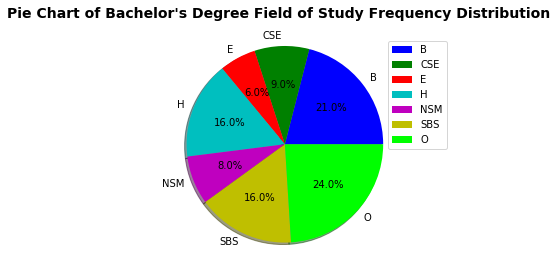

In [51]:
# 1-3: Construct a pie chart for field of study for bachelor's degree with proper label/title/legend.
%matplotlib inline 

import matplotlib.pyplot as plt

color = ['b', 'g', 'r', 'c', 'm', 'y', 'lime']
# for more named colors, 
# see https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

plt.pie(b_percent_freq, labels=fields_of_study, colors=color, autopct='%1.1f%%', shadow=True, \
        startangle=0, frame=False)
plt.legend(fields_of_study, loc="best")
plt.axis('equal')
plt.suptitle("Pie Chart of Bachelor's Degree Field of Study Frequency Distribution", fontsize=14, fontweight='bold')

plt.show()


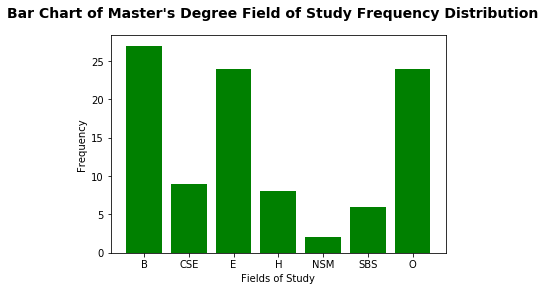

In [57]:
# 1-4: Construct a bar chart for field of study for master's degree with proper label/title/legend.
plt.bar((range(1, len(fields_of_study)+1)), m_percent_freq, color='g', align='center')
plt.xticks([x for x in range(1, len(fields_of_study)+1)], fields_of_study)
plt.xlabel('Fields of Study')
plt.ylabel('Frequency')
plt.suptitle("Bar Chart of Master's Degree Field of Study Frequency Distribution", fontsize=14, fontweight='bold')


### Problem 2 (10 points)
The 32 teams in the National Football League (NFL) are worth, on average, $1.17 billion, 5 percent more than last year. The data file "NFLTeamValue.csv" shows the annual revenue ($ millions) and the estimated team value ($ millions) for the 32 NFL teams (forbes website, February 28, 2014). 

Please read the data from "NFLTeamValue.csv" and complete the following tasks. Make sure that "NFLTeamValue.csv" is in your working directory. Pay attention to the format of the data and do not make any change to the data file.

Note: In total, there are 32 teams. Therefore, the data contains the entire population. Make sure you use appropriate formulars (for population, not for sample) when computing the values needed.

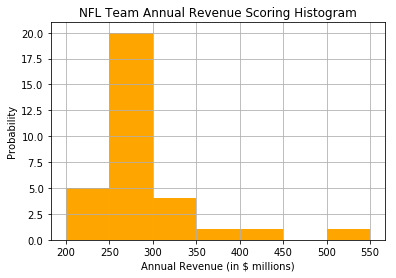

In [132]:
# 2-1: Develop and display a histogram for the annual revenue with proper label/title/legend. 
# Choose an appropriate value for the number of bins.
%matplotlib inline
import csv
import matplotlib.pyplot as plt

revenue = []
with open('NFLTeamValue.csv') as f:
    reader = csv.reader(f)
    next(reader, None)               # skip the header in NFLTeamValue.csv
    
    for row in reader:
        revenue.append(int(row[1]))

plt.hist(revenue, bins=range(200,600,50), normed=0, cumulative=0, color='orange')
plt.xlabel('Annual Revenue (in $ millions)')
plt.ylabel('Probability')
plt.title('NFL Team Annual Revenue Scoring Histogram')
plt.grid(True)
plt.show()


In [164]:
# 2-2: Compute and display the following information for the annual revenue: 
# mean, median, variance, standard deviation, 1st and 3rd quartile, 10th and 90th percentile and IQR.
# Don't simply print out a number. Make sure you clearly indicate what a number is. For example, "the mean of the annual revenue is"
import numpy as np

print("Mean of Annual Revenue is", np.mean(revenue))
print("Median of Annual Revenue is", np.median(revenue))
print("Variance of Annual Revenue is", np.var(revenue))
print("Standard Deviation of Annual Revenue is", np.std(revenue))
q75, q25 = np.percentile(revenue, [75 ,25])
print("1st quartile is", q25, "and 3rd quartile is", q75)
p10, p90 = np.percentile(revenue, [10 ,90])
print("10th percentile is", p10, "and 90th percentile is", p90)
print("IQR of Annual Revenue is", q75 - q25)


Mean of Annual Revenue is 286.46875
Median of Annual Revenue is 269.0
Variance of Annual Revenue is 3586.49902344
Standard Deviation of Annual Revenue is 59.8873861797
1st quartile is 252.75 and 3rd quartile is 293.5
10th percentile is 245.3 and 90th percentile is 336.3
IQR of Annual Revenue is 40.75


In [168]:
# 2-3: Compute and display z-scores for Dallas Cowboys, Oakland Raiders, and Chicago Bears. (2 points)
# And then print out the team names of all outliers based on z-score. 
# Read the textbook if you don't know how to determine outliers based on z-score.
import csv
import numpy as np

z_dict = {}

def z_score(ys):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return z_scores

with open('NFLTeamValue.csv') as f:
    reader = csv.reader(f)
    next(reader, None)               # skip the header in NFLTeamValue.csv
    
    for row, z_score in zip(reader, z_score(revenue)):
        z_dict[row[0]] = z_score     # dictionary with team name as key and z-score of revenue as value

print("Z-score for Dallas Cowboys is", z_dict['Dallas Cowboys'])
print("Z-score for Oakland Raiders is", z_dict['Oakland Raiders'])
print("Z-score for Chicago Bears is", z_dict['Chicago Bears'])

outlier_threshold = 3
for team in z_dict:
    if(np.abs(z_dict[team]) > outlier_threshold):
        print("Team Name of the Outlier(s) based on Z-score:", team)


Z-score for Dallas Cowboys is 4.21676860704
Z-score for Oakland Raiders is -0.959613595884
Z-score for Chicago Bears is 0.192548894443
Team Name of the Outlier(s) based on Z-score: Dallas Cowboys


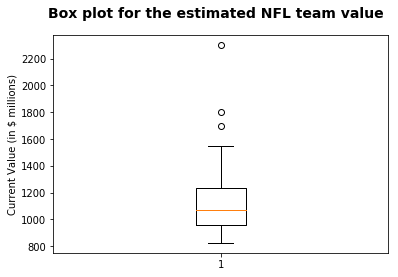

In [163]:
# 2-4: Develop and display a box for the estimated team value with proper label/title/legend.
import csv

teamvalue = []

with open('NFLTeamValue.csv') as f:
    reader = csv.reader(f)
    next(reader, None)               # skip the header in NFLTeamValue.csv
    
    for row in reader:
        teamvalue.append(float(row[2].replace(',', '')))

box = plt.boxplot(teamvalue)
plt.ylabel('Current Value (in $ millions)')
plt.suptitle("Box plot for the estimated NFL team value", fontsize=14, fontweight='bold')


In [165]:
# 2-5: Compute and display the following information for the estimated team value: 
# mean, median, variance, standard deviation, 1st and 3rd quartile, 10th and 90th percentile and IQR.
import numpy as np

print("Mean of Estimated Team Value is", np.mean(teamvalue))
print("Median of Estimated Team Value is", np.median(teamvalue))
print("Variance of Estimated Team Value is", np.var(teamvalue))
print("Standard Deviation of Estimated Team Value is", np.std(teamvalue))
q75, q25 = np.percentile(teamvalue, [75 ,25])
print("1st quartile is", q25, "and 3rd quartile is", q75)
p10, p90 = np.percentile(teamvalue, [10 ,90])
print("10th percentile is", p10, "and 90th percentile is", p90)
print("IQR of Estimated Team Value is", q75 - q25)


Mean of Estimated Team Value is 1165.46875
Median of Estimated Team Value is 1070.5
Variance of Estimated Team Value is 97077.8115234
Standard Deviation of Estimated Team Value is 311.573123879
1st quartile is 958.0 and 3rd quartile is 1233.25
10th percentile is 877.5 and 90th percentile is 1540.0
IQR of Estimated Team Value is 275.25


In [169]:
# 2-6: Print out the team names of all outliers based on IQR. (2 points)
# Read the textbook if you don't know how to determine outliers based on IQR.
import csv
import numpy as np

quartile_1, quartile_3 = np.percentile(teamvalue, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

with open('NFLTeamValue.csv') as f:
    reader = csv.reader(f)
    next(reader, None)               # skip the header in NFLTeamValue.csv
    
    for row, value in zip(reader, teamvalue):
        if((value > upper_bound) or (value < lower_bound)):
            print("Team Name of the Outlier(s) based on IQR:", row[0])


Team Name of the Outlier(s) based on IQR: Dallas Cowboys
Team Name of the Outlier(s) based on IQR: New England Patriots
Team Name of the Outlier(s) based on IQR: Washington Redskins


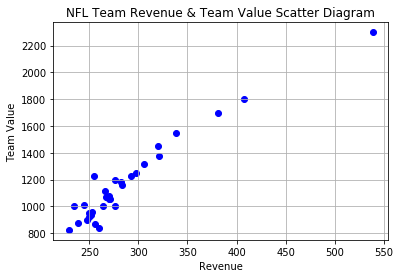

In [172]:
# 2-7: Develop a scatter diagram with Revenue on the horizontal axis and value on the vertical axis. 
# Briefly describe the relationship between the two variables?
plt.scatter(revenue, teamvalue, c='b', marker='o')
plt.xlabel('Revenue')
plt.ylabel('Team Value')
plt.title('NFL Team Revenue & Team Value Scatter Diagram')
plt.grid(True)
plt.show()


In [213]:
# 2-8: Compute and display the population covariance and correlation coefficient between the two variables.
# Briefly interpret the practical meaning of this correlation coefficient.
print("Population Covariance between Revenue and Team Value:\n", np.cov(revenue, teamvalue))
print("\nCorrelation Coefficient between Revenue and Team Value:\n", np.corrcoef(revenue, teamvalue))
print("\nInterpretation of Correlation Coefficient:\nSince the correlation data sets are exactly/closer to +1, it is interpreted as Perfect uphill (positive slope) linear relationship between Revenue and Team Value")

Population Covariance between Revenue and Team Value:
 [[   3702.19254032   18554.61189516]
 [  18554.61189516  100209.35383065]]

Correlation Coefficient between Revenue and Team Value:
 [[ 1.          0.96331482]
 [ 0.96331482  1.        ]]

Interpretation of Correlation Coefficient:
Since the correlation data sets are exactly/closer to +1, it is interpreted as Perfect uphill (positive slope) linear relationship between Revenue and Team Value


### Problem 3 (5 points)

The data file "NBA.csv" contains information on 2763 NBA players from their rookie season. The data contain seven attributes: ID, FN, LN, isAllStar, DRAFT_YR, MPG, PPG. Make sure that "NBA.csv" is in your working directory. Pay attention to the format of the data and do not make any change to the data file.

Write a Python function find_rookie(a, b) here in this cell that takes two non-negative real numbers a and b as input. The function returns a list of all players whose PPG was at least a points per game and MPG is at least b minutes per game. Please use a list for each qualified player, including FN, LN, isAllStar, DRAFT_YR, MPG, and PPG. Therefore, eventually the function will return a list of list similar to the below:

[[FN1, LN1, isAllStar1, DRAFT_YR1, MPG1, PPG1], [FN2, LN3, isAllStar2, DRAFT_YR2, MPG2, PPG2]]


In [202]:
import csv
import numpy
    
def find_rookie(a, b):
    # start your code below
    sel_players = []
    if (type(a) == int and type(b) == int and (a<0 or b<0)):
        print("This find_rookie function can take only two non-negative real numbers as input. Please correct your input parameters!")
        return None

    with open('NBA.csv') as f:
        reader = csv.reader(f)
        next(reader, None)                      # skip the header

        for row in reader:
            ppg = float(row[6])                 # 7th number of each row is MPG
            mpg = float(row[5])                 # 6th number of each row is MPG
            if(ppg >= a and mpg >= b):
                row.pop(0)                      # Strips the first field ID from the row before appending to the list
                sel_players.append(row)
    if(len(sel_players) == 0):
        return None
    return sel_players

#print(find_rookie(20, -1))
